<a href="https://colab.research.google.com/github/BrisseidaEsmeraldaGonzalezCabriales/InteligenciaArtificial_y_RedesNeuronales_UANL/blob/main/AF8_RNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AF8. Redes Neuronales Convolucionales**

Integrantes del equipo:

Brisseida Esmeralda González Cabriales 1974257

Jesús Alberto Flores Garza 1910136

Hora:N4 Grupo:008

**Explicacion de la actividad**

En esta actividad entrenamos una Red Neuronal Convolucional. Empleamos el conjunto de datos MNIST, el cual contiene imágenes de dígitos escritos a mano del 0 al 9.

Primero realizamos el preprocesamiento de los datos, separando los conjuntos de entrenamiento y de prueba. Luego, diseñamos y entrenamos un modelo de red neuronal, definimos una función de pérdida, un optimizador y utilizando la exactitud como métrica de evaluación. La capa de salida del modelo utilizó la función de activación Softmax, adecuada para la clasificación de múltiples clases.

Finalmente, evaluamos el desempeño del modelo con los datos de prueba y realizamos cinco predicciones, comparando los resultados obtenidos con los valores reales.

1. Cargar librerias

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

2. Cargar datos

In [2]:
(train_data, train_labels), (test_data, test_labels) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
#Se añadio dimensión de canal para compatibilidad
train_data = train_data.reshape((train_data.shape[0], 28, 28, 1))
test_data  = test_data.reshape((test_data.shape[0], 28, 28, 1))

In [4]:
#Nombres de las clases (0-9 dígitos)
class_names = [str(i) for i in range(10)]

3. Preprocesamiento de datos

In [5]:
# Normalizar a rango [0,1]
train_data = train_data.astype('float32') / 255.0
test_data  = test_data.astype('float32')  / 255.0

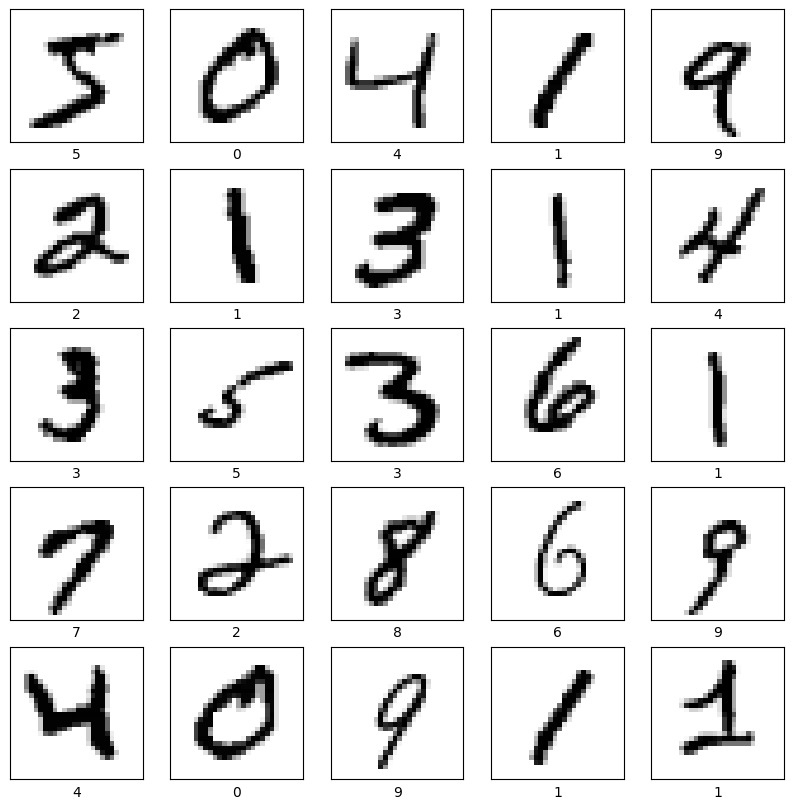

In [6]:
#Mostrar imágenes de entrenamiento
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

4. Selección y entrenamiento del modelo

In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,890 (511.29 KB)

 Trainable params: 130,890 (511.29 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
epochs = 10
history = model.fit(train_data, train_labels, epochs=epochs,
                    validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 35ms/step - accuracy: 0.9023 - loss: 0.3074 - val_accuracy: 0.9874 - val_loss: 0.0432
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9849 - loss: 0.0471 - val_accuracy: 0.9895 - val_loss: 0.0324
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9900 - loss: 0.0299 - val_accuracy: 0.9887 - val_loss: 0.0341
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 35ms/step - accuracy: 0.9928 - loss: 0.0231 - val_accuracy: 0.9887 - val_loss: 0.0323
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9937 - loss: 0.0186 - val_accuracy: 0.9893 - val_loss: 0.0357
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.9951 - loss: 0.0146 - val_accuracy: 0.9919 - val_loss: 0.0279
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9963 - loss: 0.0109 - val_accuracy: 0.9904 - val_loss: 0.0353
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9962 -

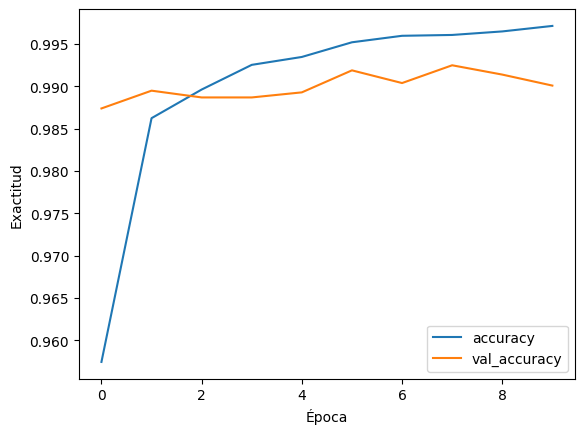

In [12]:
#Graficar exactitud
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Época')
plt.ylabel('Exactitud')
plt.legend(loc='lower right')
plt.show()


5. Prueba del modelo

In [13]:
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print(f"\nExactitud del modelo en datos de prueba: {test_acc:.4f}")

313/313 - 4s - 12ms/step - accuracy: 0.9901 - loss: 0.0412

Exactitud del modelo en datos de prueba: 0.9901


In [14]:
#Evaluacion con porcentaje
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print("\nExactitud en datos de prueba: {:.2f}%".format(test_acc * 100))

313/313 - 3s - 9ms/step - accuracy: 0.9901 - loss: 0.0412

Exactitud en datos de prueba: 99.01%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


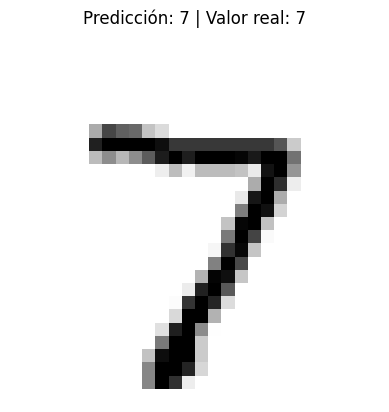

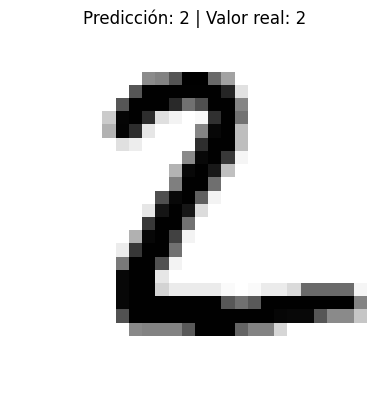

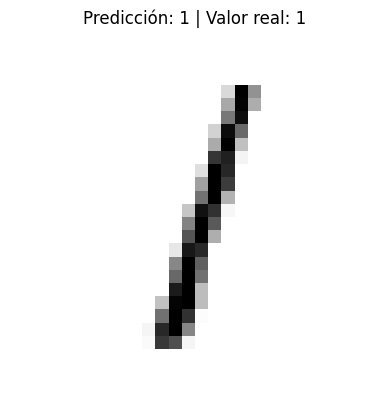

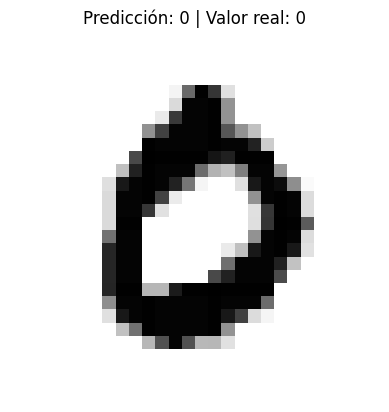

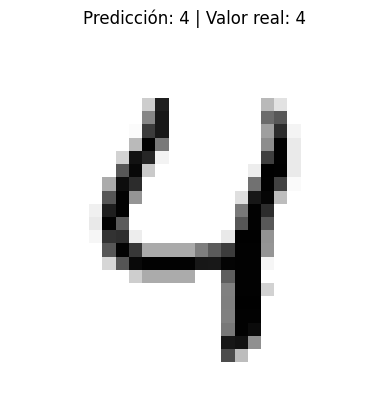

In [15]:
#Realizar 5 predicciones y mostrar resultados
predictions = model.predict(test_data[:5])
for i in range(5):
    plt.imshow(test_data[i].reshape(28,28), cmap=plt.cm.binary)
    plt.title(f"Predicción: {class_names[np.argmax(predictions[i])]} | Valor real: {class_names[test_labels[i]]}")
    plt.axis('off')
    plt.show()